<a href="https://colab.research.google.com/github/zolo012/Machine_learning/blob/main/Titanic_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory analysis homework**

*Abstract: Investigate titanics data*

Creator: Bereczki Zoltán (XE9TF2)

**First task**

Load the above-linked csv file as a pandas dataframe. Check & plot if any of the columns has missing values. If they have, investigate if the missingness is random or not.¶ Impute the missing values in a sensible way:
- if only a very small percentage is missing, imputing with the column-wise mean makes sense, or also removing the missing rows makes sense 
- if in a row almost all the entries is missing, it worth to remove that given row 
- if a larger portion is missing from a column, usually it worth to encode that with a value that does not appear in the dataset (eg: -1). The imputing method affects different machine learning models different way, but now we are interested only in EDA, so try to keep as much information as possible!


In [ ]:
#Import required modules
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Create pandas dataframe from the csv file
titanics_df = pd.read_csv('http://patbaa.web.elte.hu/physdm/data/titanic.csv')
titanics_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanics_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanics_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanics_df.shape

(891, 12)

There are 891 rows and 12 columns.

In [ ]:
titanics_df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check the number of missing values in each column
titanics_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanics_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The cabin column has many missing values, more than 50%. 

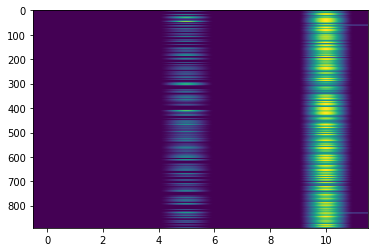

In [ ]:
# Plot the missing values 
plt.imshow(titanics_df.isna(), aspect='auto')

Check whether missing values are overlapped between columns

In [ ]:
# Check the rows where there are missing values of 'embarked' column
titanics_df[titanics_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Where there are missing values in 'embarked' column there aren't any other missing values in the row, thereby changing unknown value into non-relevant values (ex.: -1) (see later)

In [ ]:
# Check the rows where there are missing values of 'age' column
titanics_df[titanics_df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
# Check the rows where there are missing values of 'cabin' column
titanics_df[titanics_df.Cabin.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
# Check are there overlap between missing values of 'age' and 'cabin' columns
print(titanics_df.loc[titanics_df.Cabin.isna(), 'Age'].isna().value_counts()) # number of missing values in 'cabin' column
print('\nSelf-checking\n')
print(titanics_df.loc[titanics_df.Age.isna(), 'Cabin'].isna().value_counts()) # missing values in 'age' column

False    529
True     158
Name: Age, dtype: int64

Self-checking

True     158
False     19
Name: Cabin, dtype: int64


There are overlaps in 158 rows. The 'cabin' column can be removed since it's not need in the further tasks and missing the values of almost the entire column. However the 'age' column is needed in further tasks, so I cannot remove it and moreover just a small percentage of its missing, thus the best solution if I change the missing values with column wise mean.

In [ ]:
# Set -1 where there are missing values in embark column
titanics_df['Embarked'].fillna(value=-1, inplace=True)

# Self-checking
titanics_df.iloc[[61, 829], :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,-1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,-1


In [ ]:
# Remove 'cabin' column
titanics_df.drop(columns='Cabin', inplace=True)

# Self-checking
titanics_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Compute the mean of age column
age_mean = round(titanics_df['Age'].mean())
print(age_mean, '\n')
titanics_df.Age.fillna(value=age_mean, inplace=True)
titanics_df.iloc[[5, 888], :]

30 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S


In [ ]:
# Self-checking the first task
titanics_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Second task** 

Create a heatmap which shows how many people survived and dies with the different Pclass variables. You need to create a table where the columns indicates if a person survived or not, the rows indicates the different Pclass and the cell values contains the number of people belonging the that given category. The table should be colored based on the value of the cells in the table.

In [ ]:
survived_ppl_df = titanics_df[titanics_df.Survived == 0]
survived_ppl_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S


In [ ]:
died_ppl_df = titanics_df[titanics_df.Survived == 1]
died_ppl_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [ ]:
titanics_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# Prepare for panda dataframe creation
col_names = ['survived', 'died']
idx = [1, 2, 3]



In [ ]:
#Number of first class died people
first_died_ppl_numb = len(titanics_df[titanics_df.Survived == 0][titanics_df.Pclass == 1])
print('The number of died people in first class: {}'.format(first_died_ppl_numb))

# Number of first class survived people
first_surv_ppl_numb = len(titanics_df[titanics_df.Survived == 1][titanics_df.Pclass == 1])
print('The number of survived people in first class: {}'.format(first_surv_ppl_numb))

# Number of second class died people
second_died_ppl_numb = len(titanics_df[titanics_df.Survived == 0][titanics_df.Pclass == 2])
print('The number of died people in second class: {}'.format(second_died_ppl_numb))

# Number of second class survived people
second_surv_ppl_numb = len(titanics_df[titanics_df.Survived == 1][titanics_df.Pclass == 2])
print('The number of dsurvived people in second class: {}'.format(second_surv_ppl_numb))

# Number of third class died people
third_died_ppl_numb = len(titanics_df[titanics_df.Survived == 0][titanics_df.Pclass == 3])
print('The number of died people in third class: {}'.format(third_died_ppl_numb))

# Number of third class survived people
third_surv_ppl_numb = len(titanics_df[titanics_df.Survived == 1][titanics_df.Pclass == 3])
print('The number of died people in third class: {}'.format(third_surv_ppl_numb))

The number of died people in first class: 80
The number of survived people in first class: 136
The number of died people in second class: 97
The number of dsurvived people in second class: 87
The number of died people in third class: 372
The number of died people in third class: 119


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
surv_died_across_classes_df = pd.DataFrame([[first_surv_ppl_numb, first_died_ppl_numb], [second_surv_ppl_numb, second_died_ppl_numb], [third_surv_ppl_numb, third_died_ppl_numb]],
             columns = col_names, index = idx)

**Heat map creation**


In [ ]:
# First method by using panda
surv_died_across_classes_df.style.background_gradient(cmap = 'viridis')\
.set_properties(**{'font-size': '20px'})

,survived,died
1,136,80
2,87,97
3,119,372


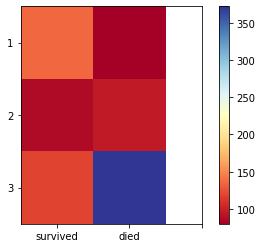

In [ ]:
# Second method by using matplotlib 

plt.imshow(surv_died_across_classes_df, cmap='RdYlBu')
plt.colorbar()
plt.xticks(range(len(surv_died_across_classes_df)), surv_died_across_classes_df.columns)
plt.yticks(range(len(surv_died_across_classes_df)), surv_died_across_classes_df.index)
plt.show()

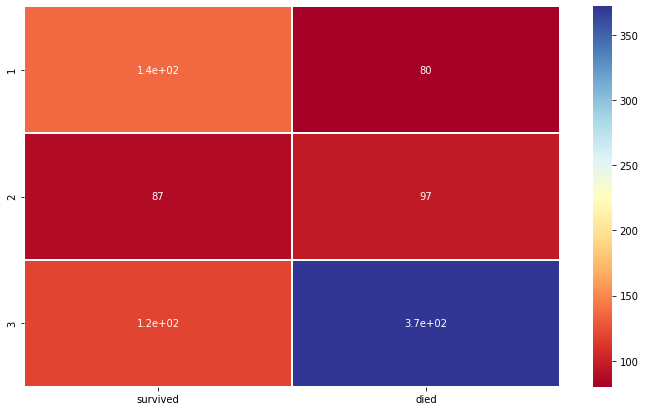

In [ ]:
# Third method by using seaborn

fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(surv_died_across_classes_df, cmap='RdYlBu', linewidths= 0.30, annot=True)

**Third task**

Create boxplots for each different Pclass. The boxplot should show the age distribution for the given Pclass. Plot all of these next to each other in a row to make it easier to compare!¶



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

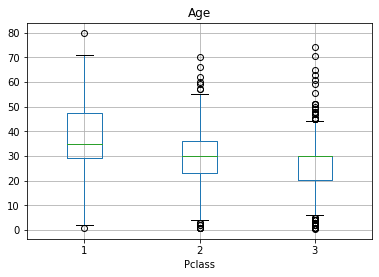

In [ ]:
# First method by using panda

titanics_df.boxplot(by = 'Pclass', column='Age')
plt.suptitle('')

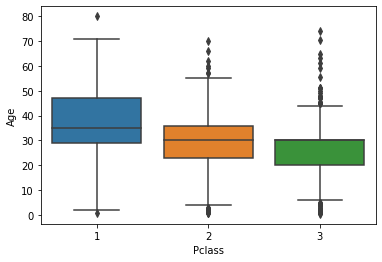

In [ ]:
# Second method by using seaborn

sns.boxplot(x = 'Pclass', y = 'Age', data = titanics_df)

**Fourth task**

Calculate the correlation matrix for the numerical columns. Show it also as a heatmap described at the 1st task.¶ Which feature seems to play the most important role in surviving/not surviving? Explain how and why could that feature be important!

In [ ]:
# Create correlation matrix

titanics_corr = titanics_df.corr()
titanics_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033019,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500
Age,0.033019,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.057527,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000


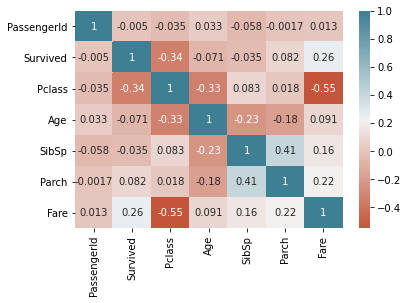

In [ ]:
# Display correlation matrix with using seaborn heatmap

sns.heatmap(titanics_corr, cmap=sns.diverging_palette(20, 220, n=200), annot=True)

The survival of the people mainly depended on their passenger fare that were affordable and paid by themselves, thereby If somebody could afford a more expensive fare (buy ticket for first class) then he/she survived the catastrophy with higher chance in compairing to those who couldn't buy more expensive ticket and must travel in the third class. The correlation matrix doesn't show correlation between the survival and the class, but there's a relatively strong correlation according the other variables between survival and fare which implies that who paid more money, he must buy a first ticket, thereby have to be correlation between two as well. Buying higher level ticket may helped the survival because the first class was closer the top of the ship and they were rescued firstly before the passengers of other classes.

We can also see a positive correlation between survival and parch. This is also logical, since who has more relatives in the ship (they were in the same class, thus same level of ship) then they could help each outher during escaping from Titanic. The basic of this thought is that we usually help our relatives before anyone else and this should be the case in a catastrophy as well.


**Five task**

Create two plots which you think are meaningful. Interpret both of them. (Eg.: older people buy more expensive ticket? people buying more expensive ticket survive more? etc.)

In [ ]:
titanics_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


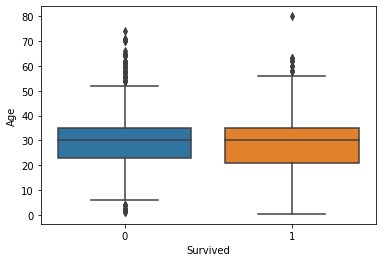

In [ ]:
# Boxplot about the survival and age relationship

sns.boxplot(x = 'Survived', y = 'Age', data = titanics_df)

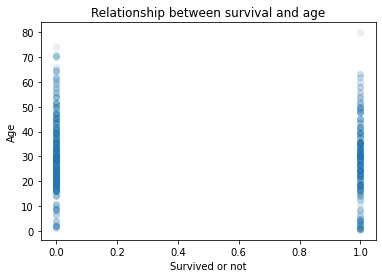

In [ ]:
# Scatter plot about the same

plt.ylabel('Age')
plt.xlabel('Survived or not')
plt.title('Relationship between survival and age')

plt.scatter(titanics_df.Survived, titanics_df.Age, alpha = 0.1)


We can see younger people (20-40) survived with higher chance, because they should be stronger, faster, maybe more agressive during the escape. 

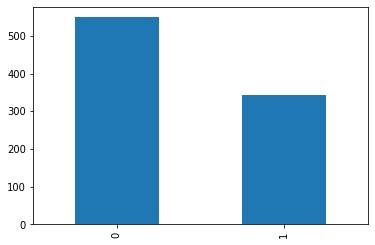

In [ ]:
# Plot how many people survived and died

titanics_df.Survived.value_counts().plot(kind="bar")

We can see about 550 people survived and 350 died.

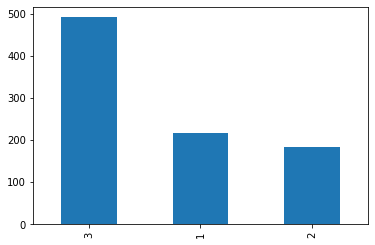

In [ ]:
# Find out which class were there the most in by plotting

titanics_df['Pclass'].value_counts().plot(kind='bar')

It's obvious the largest piece of people was in third class.

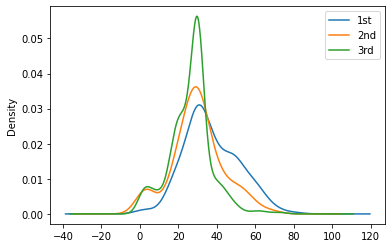

In [ ]:
# Investigate the relationship between the class and age

for cls in [1, 2, 3]:
  titanics_df.Age[titanics_df['Pclass'] == cls].plot(kind='kde')  
plt.legend(('1st', '2nd', '3rd'))

# source: https://www.kaggle.com/saisivasriram/titanic-feature-understanding-from-plots

There were older people in the first class than the other two, since the older people had higher chance in term of time to be able to gain enough money to afford the first class' price. 

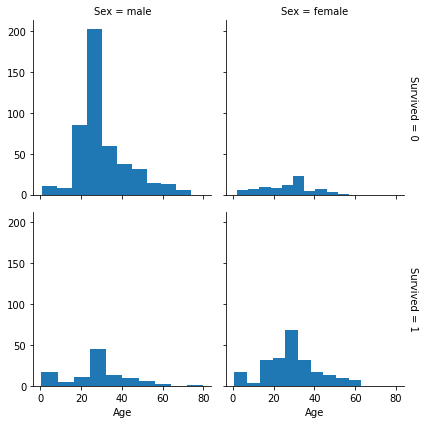

In [ ]:
# Check the relation of sex and survival chance with plotting

fcg = sns.FacetGrid(titanics_df, col='Sex', row='Survived', margin_titles=True)
fcg.map(plt.hist, 'Age')

# source: https://www.kaggle.com/saisivasriram/titanic-feature-understanding-from-plots

Much more men died than women and mostly those men died who were in their 30's, but this latter statement is not believable completely since I changed the missing values (~177) in age column with its mean was 30.
The explanation of result can be ex.: women were rescued before the men if they kept the general and also ship's etiquette. On the other hand we must investigate the content of passengers in term of their sexes (see below).

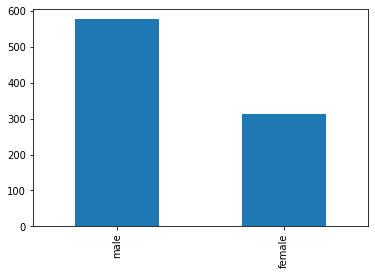

In [ ]:
# Plot about number of males and females

titanics_df.Sex.value_counts().plot(kind='bar')

As we can see there were more men about twice of females, thus this can also explain why did more males died, because they were originally more.